# CNA Homework

## Part 1

**Reddit Networks**

Using the [Reddit networks dataset],(http://dynamics.cs.washington.edu/nobackup/reddit/) select the subreddit of your favorite TV show. Using the data of the selected subreddit, answer the following questions:

In [1]:
import networkx as nx
import turicreate as tc 
import matplotlib.pyplot as plt
%matplotlib inline

*Task 1*: Calculate and visualize the degree distribution of the vertices in the network

In [7]:
fname = "BattleNetwork.tar.gz"
!wget http://dynamics.cs.washington.edu/nobackup/reddit/$fname
# !wget http://dynamics.cs.washington.edu/nobackup/reddit/rickandmorty.tar.gz

--2020-01-18 17:16:41--  http://dynamics.cs.washington.edu/nobackup/reddit/BattleNetwork.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1942510 (1.9M) [application/x-gzip]
Saving to: ‘BattleNetwork.tar.gz’

BattleNetwork.tar.g 100%[===================>]   1.85M   309KB/s    in 6.4s    

2020-01-18 17:16:48 (298 KB/s) - ‘BattleNetwork.tar.gz’ saved [1942510/1942510]



In [8]:
import tarfile

if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall(path="./data/")
    tar.close()

In [9]:
import os
from tqdm.auto import tqdm
import turicreate as tc

g = tc.SGraph()
graphs_dir = "data"
sframes_path = [ graphs_dir + "/" + file for file in os.listdir(graphs_dir)]
for folder in tqdm(sframes_path):
    if not folder.endswith(".sgraph"):
        continue
    subG =tc.load_sgraph(folder)
    g = g.add_vertices(subG.get_vertices())
    g = g.add_edges(subG.get_edges())

In [10]:
def sgraph2nxgraph(sgraph, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = nx.DiGraph()
    else:
        nx_g = nx.Graph()
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sgraph.vertices]
    else:
        vertices = list(sgraph.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sgraph.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sgraph.get_edges()]
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    return nx_g


ng = sgraph2nxgraph(g)
print("Networkx: %s" % nx.info(ng))

Networkx: Name: 
Type: DiGraph
Number of nodes: 1564
Number of edges: 5118
Average in degree:   3.2724
Average out degree:   3.2724


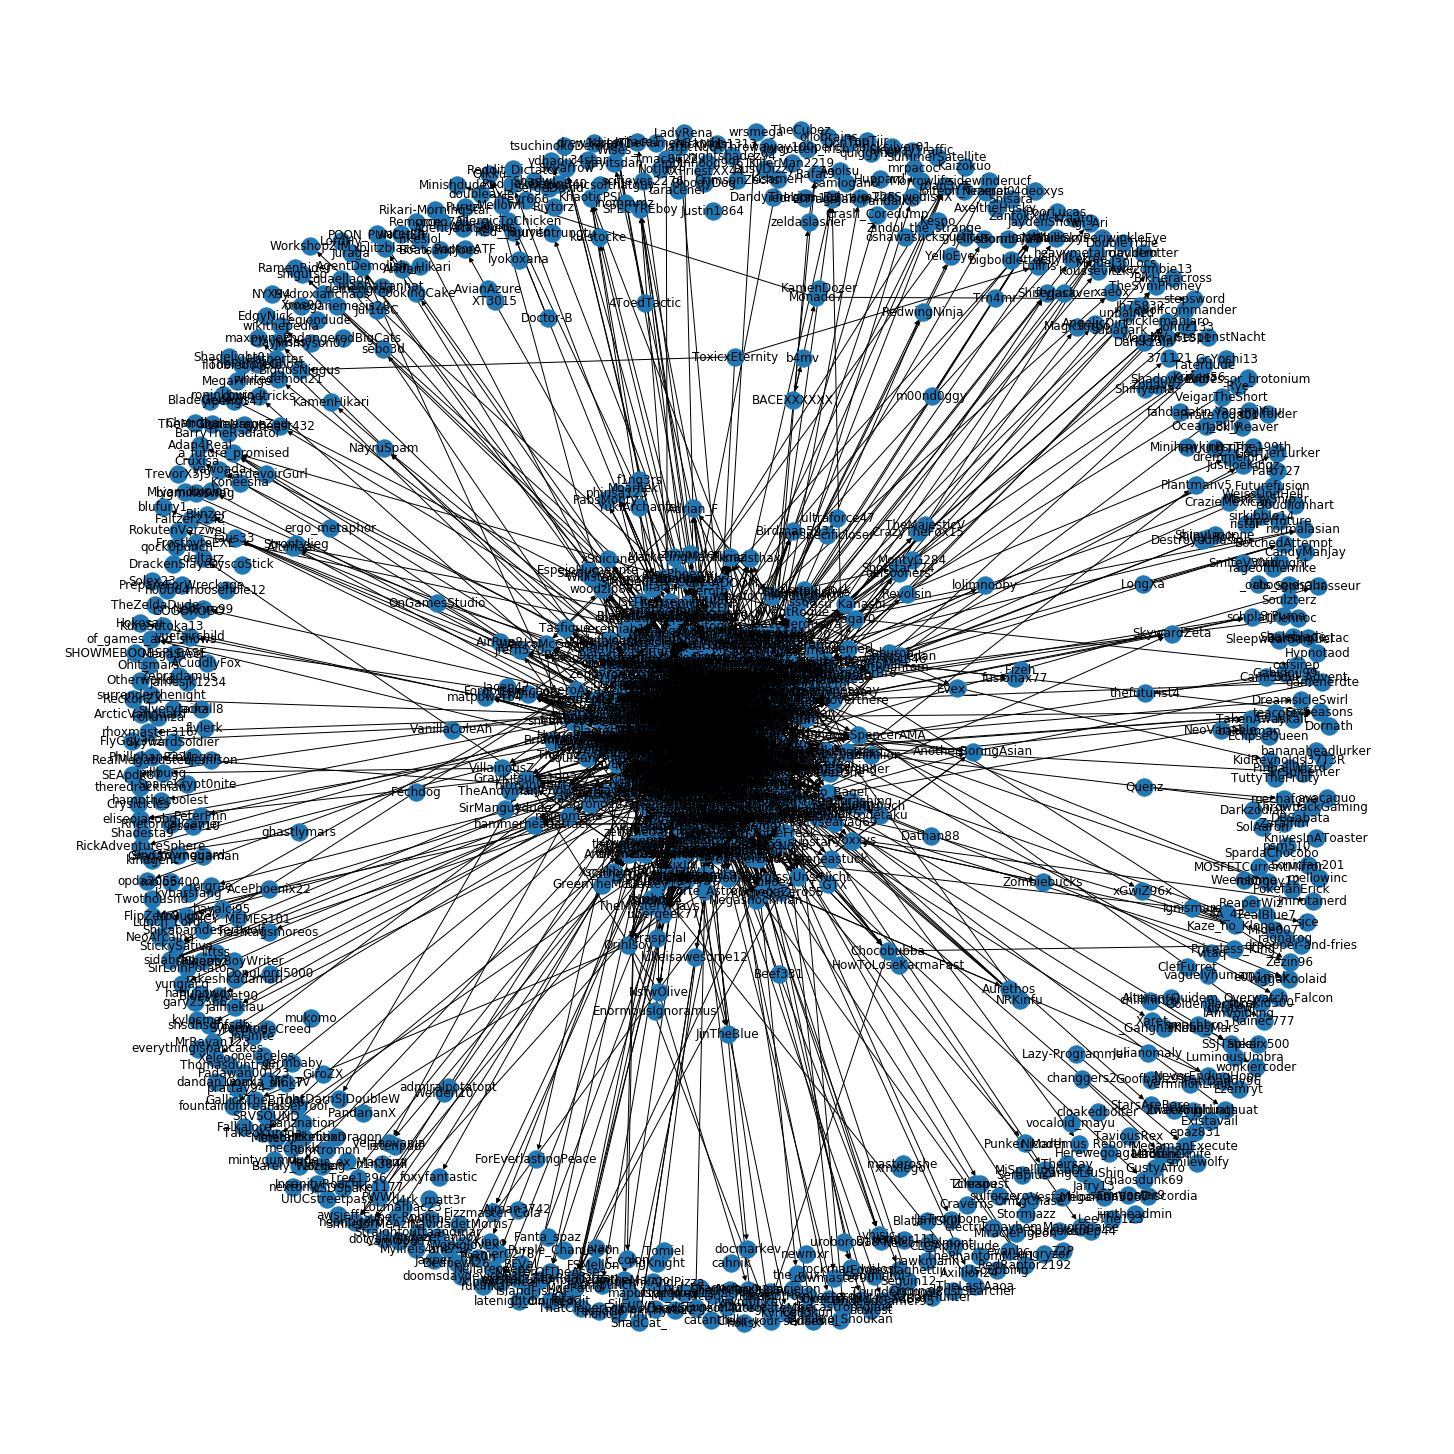

In [12]:
def print_graph(ng):
    l = [n for n, degree in dict(ng.degree()).items()]
    h = ng.subgraph(l)
    plt.figure(figsize=(20,20))
    # nx.write_gml(h, "/tmp/network.gml")
    nx.draw_spring(h, with_labels=True)
    
    
print_graph(ng)

*Task 2*: Create a subgraph of the top-20 users according to the PageRank algorithm. Draw the subgraph.

In [105]:
pr = tc.pagerank.create(g)
def most_central_k(pr, k):
    list_k = list(pr['pagerank'].sort('pagerank', ascending=False)[:k]['__id'])
    return list_k



Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 1473.3                |

| 2         | 373.24                |

| 3         | 125.102               |

| 4         | 54.5194               |

| 5         | 28.9349               |

| 6         | 18.8734               |

| 7         | 14.2633               |

| 8         | 11.0316               |

| 9         | 8.76982               |

| 10        | 7.03245               |

| 11        | 5.67716               |

| 12        | 4.59803               |

| 13        | 3.73049               |

| 14        | 3.02783               |

| 15        | 2.45892               |

| 16        | 1.99829               |

| 17        | 1.62379               |

| 18        | 1.32081               |

| 19        | 1.07405               |

| 20        | 0.874281              |

+-----------+-----------------------+

Name: 
Type: DiGraph
Number of nodes: 20
Number of edges: 247
Average in degree:  12.3500
Average out degree:  12.3500


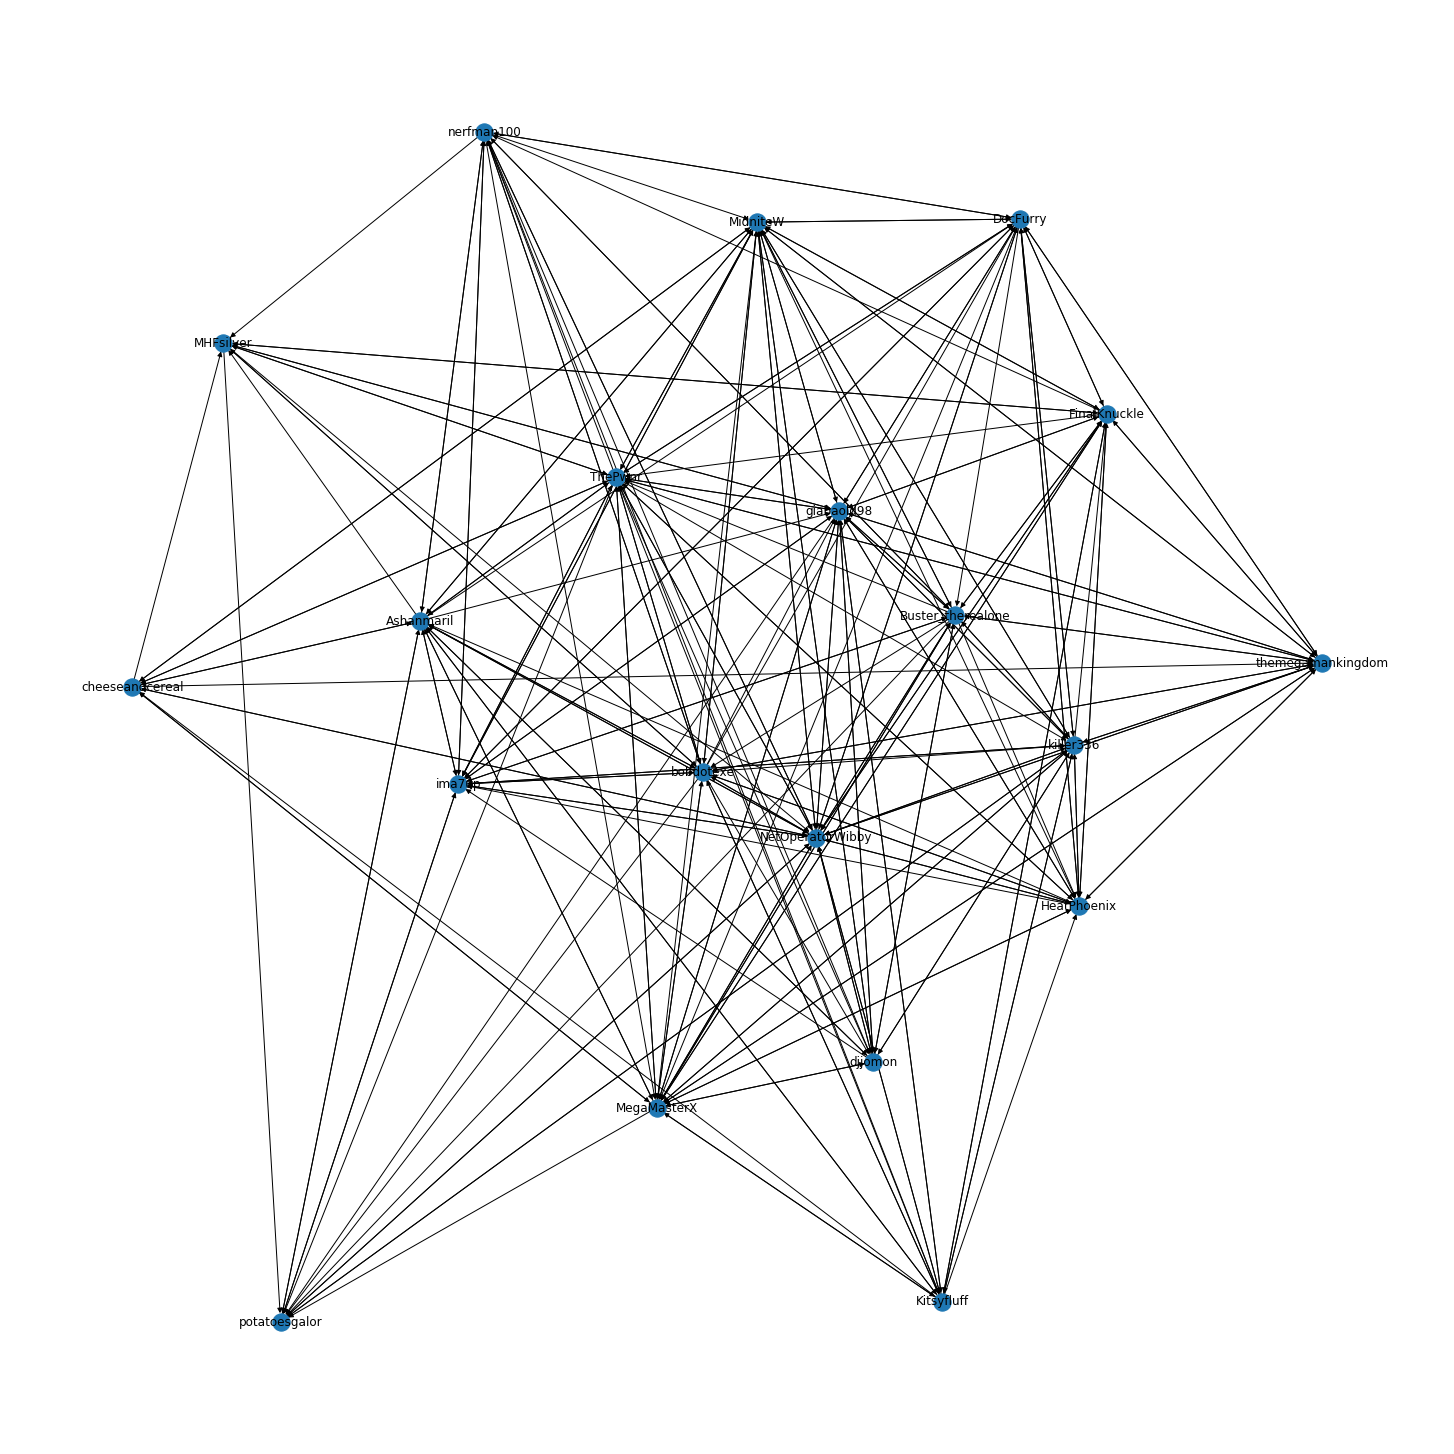

In [106]:
l20 = most_central_k(pr, 20)
subgraph20 = ng.subgraph(l20)
print(nx.info(subgraph20))
print_graph(subgraph20)

In [102]:
def find_central_node(graph):
    print("-"*100)
    print(nx.info(graph))
    d = nx.degree_centrality(graph)
    hero = max(dict(d).items(), key=operator.itemgetter(1))[0]
    print("The most central role according to Degree Centrality is %s" % hero)

    d = nx.pagerank(graph)
    hero = max(dict(d).items(), key=operator.itemgetter(1))[0]
    print("The most central  role according to PageRank is %s" % hero)

    d = nx.closeness_centrality(graph)
    hero = max(dict(d).items(), key=operator.itemgetter(1))[0]
    print("The most centcentral role according to Closeness Centrality is %s" % hero)

In [104]:
find_central_node(ng)

----------------------------------------------------------------------------------------------------
Name: 
Type: DiGraph
Number of nodes: 1564
Number of edges: 5118
Average in degree:   3.2724
Average out degree:   3.2724
The most central role according to Degree Centrality is Buster_therealone
The most central  role according to PageRank is killer336
The most centcentral role according to Closeness Centrality is killer336


In [96]:
import operator

#other methode : not sure it's correct

# def most_central(ng, k):
#     degrees = ng.degree()
#     return sorted(dict(degrees).items(), key=operator.itemgetter(1), reverse=True)[:k]

# top20 = most_central(ng, 20)
# print(top20)

# list(dict(d).items())[:-20]
# max(dict(d).items(), key=operator.itemgetter(1))

In [47]:
# selected_nodes_list = [n for n, d in dict(degrees).items() if d in top20]

selected_nodes_list = [n for n, d in dict(top20).items()]
# create a subgraph with only nodes from the above list
subgraph20 = ng.subgraph(selected_nodes_list)

print(nx.info(subgraph20))

Name: 
Type: DiGraph
Number of nodes: 20
Number of edges: 255
Average in degree:  12.7500
Average out degree:  12.7500


*Task 3*: Visualize the distribution of the network's strongly and weakly connected components.

In [97]:
wcc = sorted(nx.weakly_connected_components(ng), key=len, reverse=True)
[len(c) for c in wcc][:20]

[1188, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]

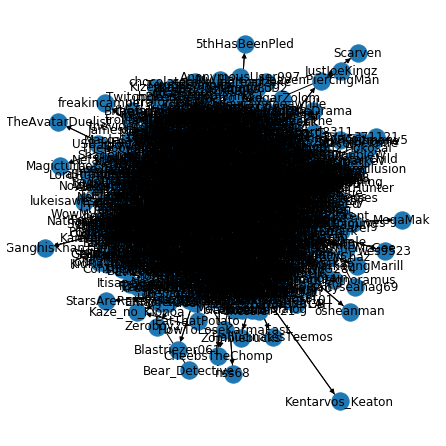

In [98]:
# for this dataset or we print 1188 vertices or 2 so it's not possible to print something good 
h = ng.subgraph(wcc[0])
plt.figure(figsize=(6,6))
nx.draw_kamada_kawai(h, with_labels=True)
# nx.draw_spring(h, with_labels=True)

In [155]:
scc = sorted(nx.strongly_connected_components(ng), key=len, reverse=True)
[len(c) for c in scc][:20]

[785, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]

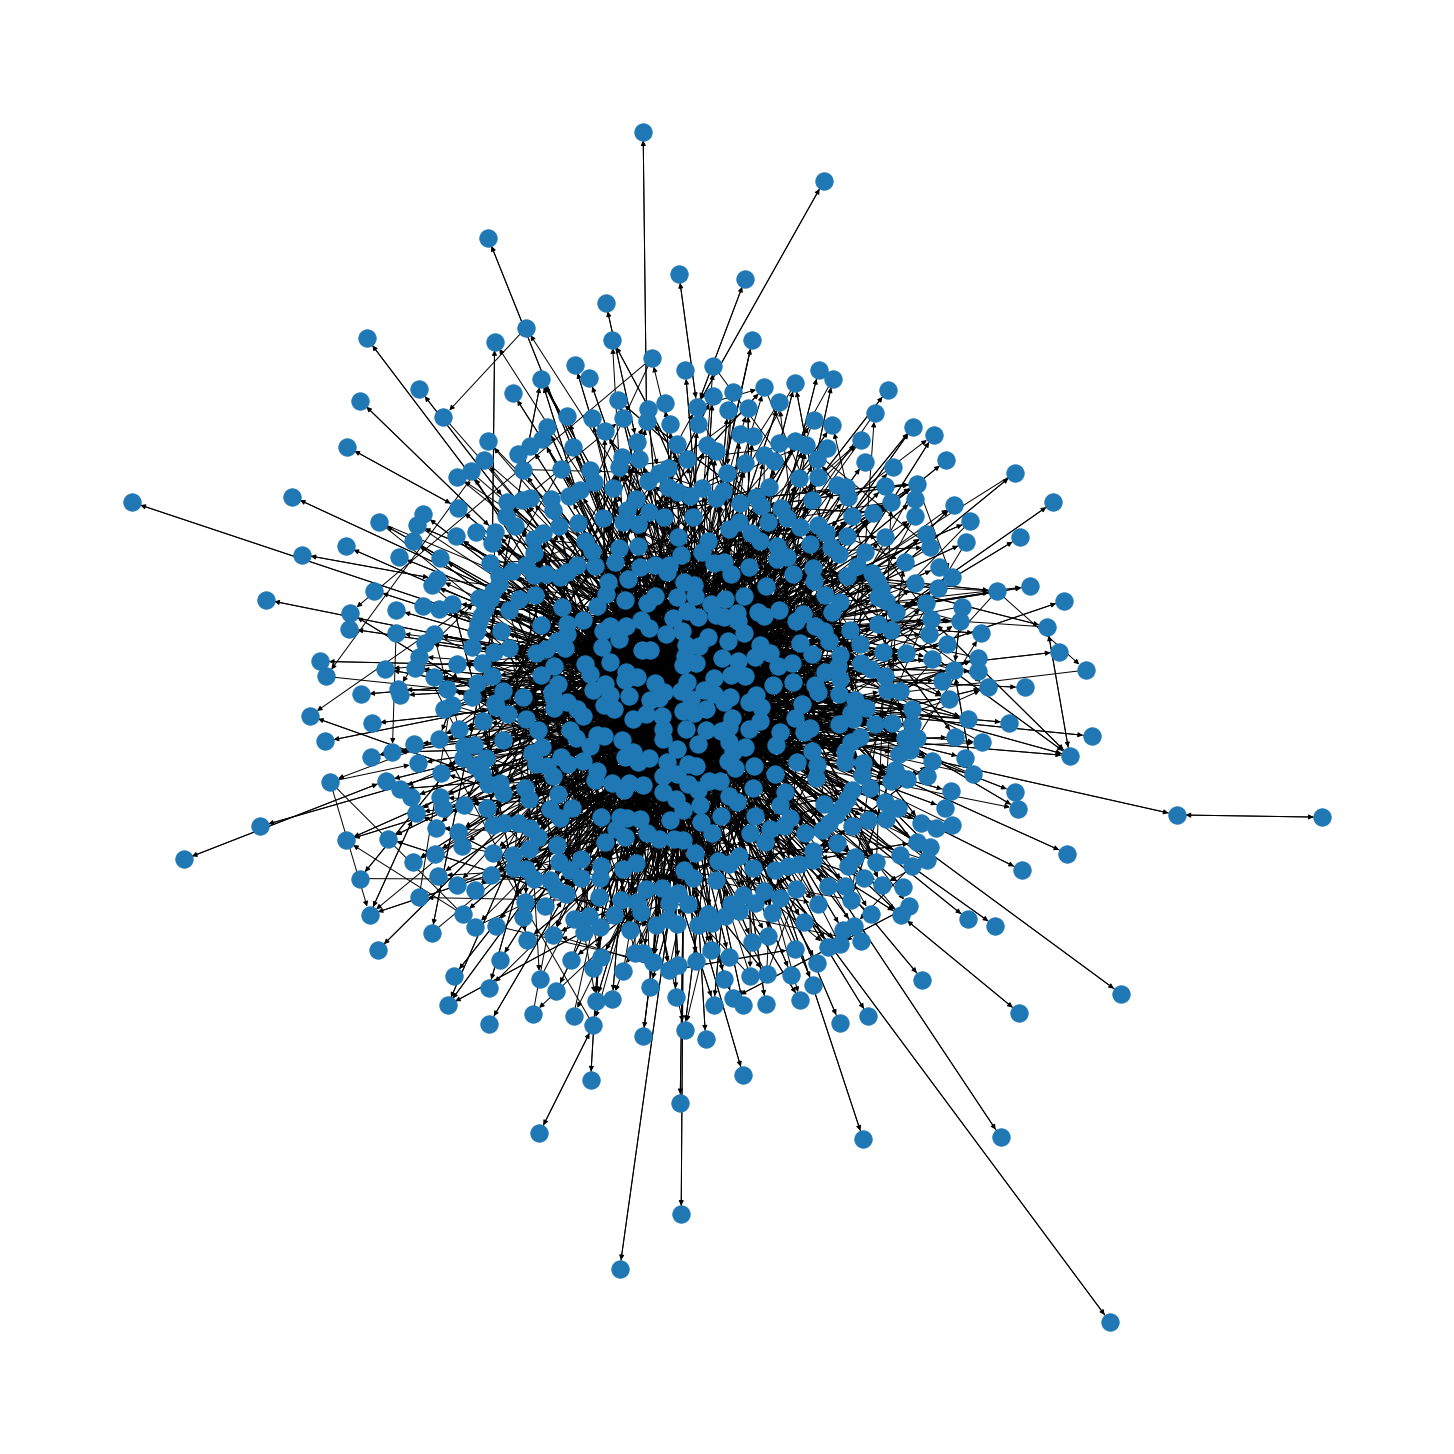

In [159]:
h = ng.subgraph(scc[0])
plt.figure(figsize=(20,20))
nx.draw_kamada_kawai(h)

*Task 4*: Split the network into communities, and find the second most central vertex in each community.

In [99]:
from networkx.algorithms.community.label_propagation import label_propagation_communities
ung = ng.to_undirected()
cc = list(label_propagation_communities(ung))
len(cc)

408

In [117]:
community_size_list = [c for c in cc if len(c) > 3]

for c in community_size_list:
    sub_c = ng.subgraph(c)
    d = nx.pagerank(sub_c)
    vertex = sorted(dict(d).items(), key=operator.itemgetter(1), reverse=True)
    print("The second most central vertex according to PageRank is %s" % vertex[1][0])


The second most central vertex according to PageRank is NetOperatorWibby
The second most central vertex according to PageRank is Buster_therealone
The second most central vertex according to PageRank is SaladDammit
The second most central vertex according to PageRank is dragonitetrainer
The second most central vertex according to PageRank is micajoeh
The second most central vertex according to PageRank is NackTheDragon
The second most central vertex according to PageRank is Yosinuke
The second most central vertex according to PageRank is stealthcl0wn
The second most central vertex according to PageRank is 5thHasBeenPled
The second most central vertex according to PageRank is DestroyedIlusion
The second most central vertex according to PageRank is erosPhoenix
The second most central vertex according to PageRank is Chocobubba
The second most central vertex according to PageRank is Willistay
The second most central vertex according to PageRank is KillTheDrama
The second most central verte

#### Notes
Below are just extra

In [101]:
from networkx.algorithms.community import greedy_modularity_communities
cc = greedy_modularity_communities(ung) # this can take some time
len(cc)

408

(array([404.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([  1. ,  50.8, 100.6, 150.4, 200.2, 250. , 299.8, 349.6, 399.4,
        449.2, 499. ]),
 <a list of 10 Patch objects>)

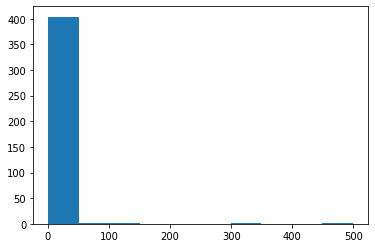

In [193]:
community_size_list = [len(c) for c in cc]
plt.hist(community_size_list)

In [194]:
selected_community_list = [c for c in cc if 500 > len(c) > 100]
len(selected_community_list)

3

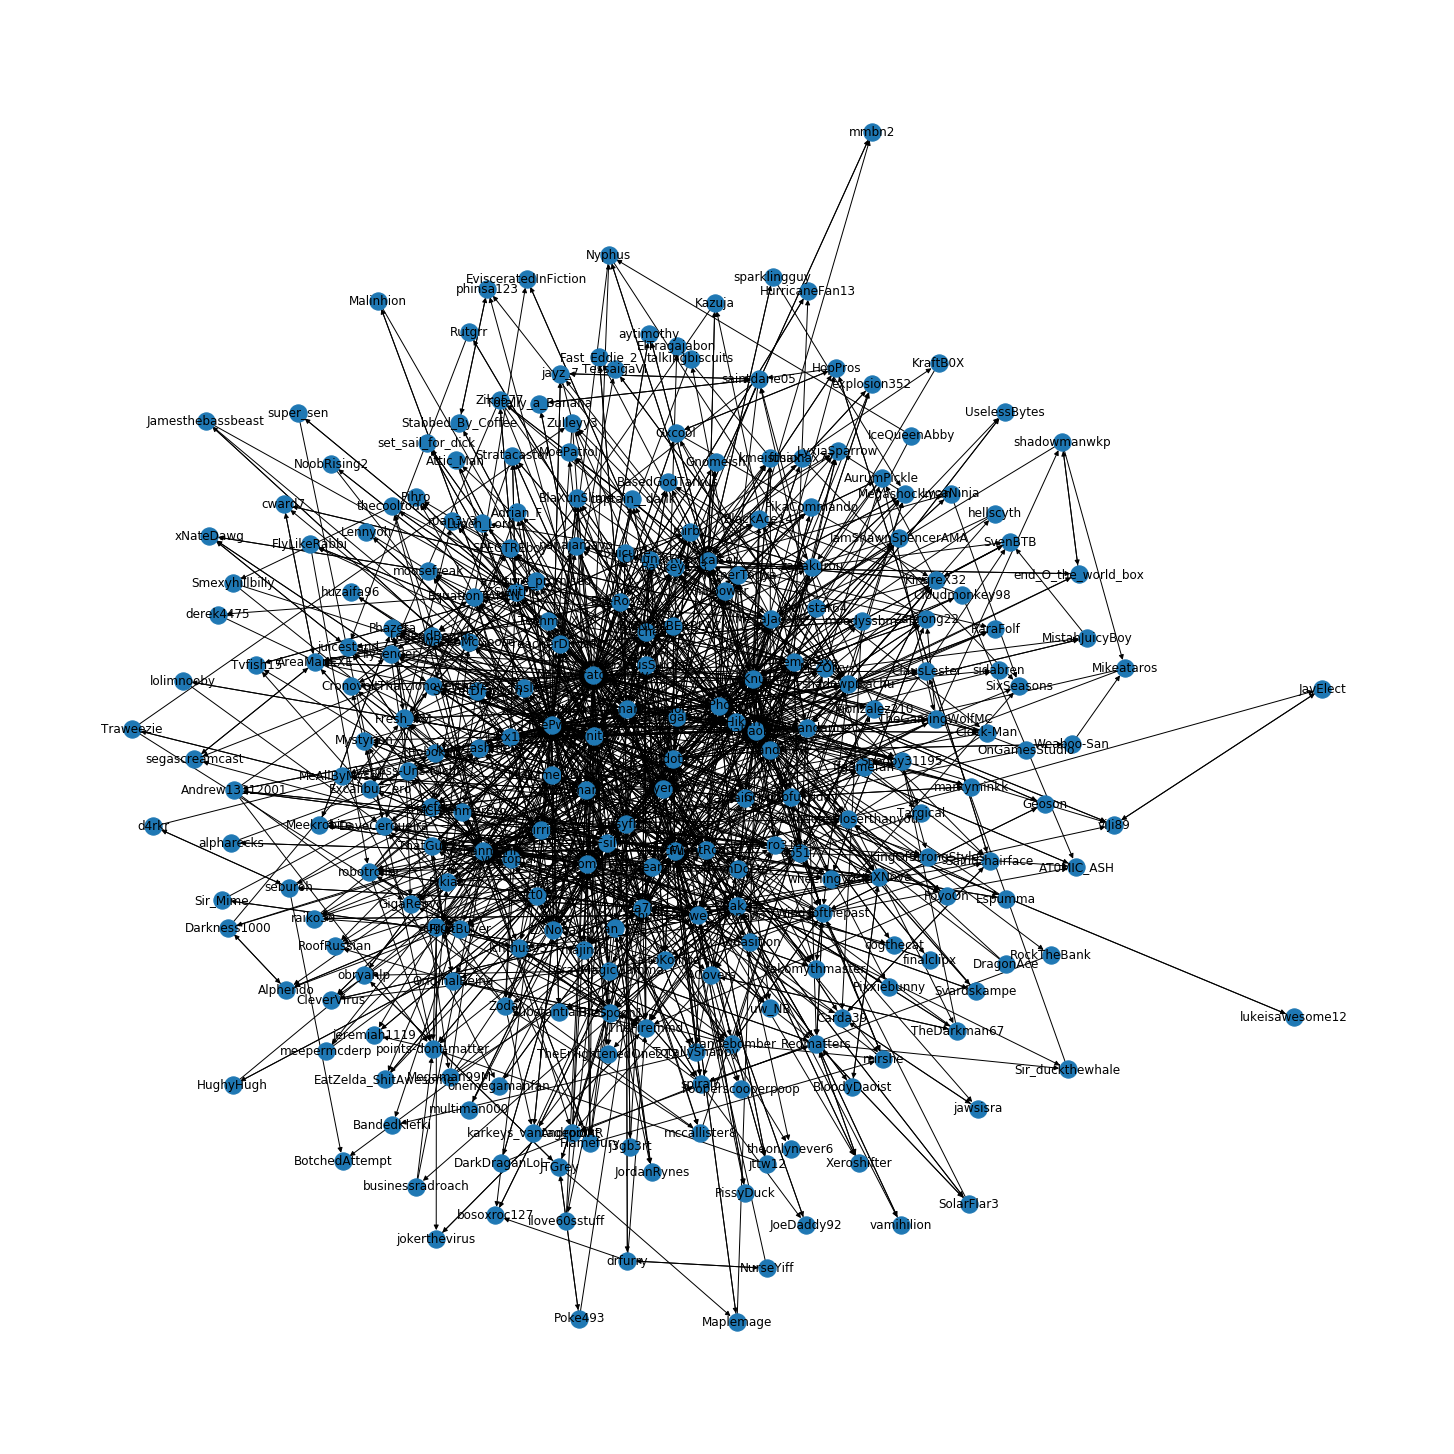

In [195]:
plt.figure(figsize=(20,20))
c1 = h.subgraph(selected_community_list[0])
nx.draw_kamada_kawai(c1, with_labels=True)

In [166]:
selected_nodes_list = [n for n,d in dict(degrees).items() if d > 3]
# create a subgraph with only nodes from the above list
h = ng.subgraph(selected_nodes_list)
print(nx.info(h))

Name: 
Type: DiGraph
Number of nodes: 662
Number of edges: 4353
Average in degree:   6.5755
Average out degree:   6.5755


In [179]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(ng)
top_level_communities = next(communities_generator)
# for community in next(communities_generator):


In [175]:
import networkx as nx
from networkx.algorithms import community
G = nx.barbell_graph(5, 1)
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, top_level_communities))

[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9, 10]]

## Part 2

In [206]:
import networkx as nx
from networkx.algorithms.centrality import *
from scipy.stats import spearmanr 
from networkx.generators.geometric import random_geometric_graph
from networkx.algorithms.community import * 

### Lets generate some networks

Every network contains four sets of nodes. $a\in \{0.1,0.01\}$ is the probability for an edge between two nodes in the same set. $b\in \{0.1,0.01\}$ is the probability for an edge between two nodes in different communities.

In [207]:
blocks = [100,100,100,100]
probs = [
        [[a,b,b,b],
         [b,a,b,b],
         [b,b,a,b],
         [b,b,b,a]]
    for a,b in [(0.01,0.01),(0.1,0.01),(0.01,0.1)]
    ]

In [208]:
nets = [nx.generators.community.stochastic_block_model(blocks, p) for p in probs * 100]
print("There are {} networks in total.".format(len(nets)))

There are 300 networks in total.


### Node centrality 
Your code is here: replace [] accordingly to the comment in the row



In [215]:
centralities =  [ {
                    'degree':[list(degree_centrality(G).values())], #replace [] with a sequence of node degree centralities 
                    'closeness':[list(nx.closeness_centrality(G).values())], #replace [] with a sequence of node closeness centralities  
                    'betweenness': [list(nx.betweenness_centrality(G).values())] #replace [] with a sequence of node betweenness centralities
                  } 
                for G in nets
                ]

In [216]:
#here we compute the corralations between the three centrality measures for each network
#every network is characterized by the tripplet of centrality correlations
centrality_correlations = [
    (
        spearmanr(c['degree'],c['closeness'])[0],
        spearmanr(c['degree'],c['betweenness'])[0],
        spearmanr(c['betweenness'],c['closeness'])[0],
    )
    for c in centralities
]

### Build a meta-network

where networks are nodes connected by an edge if their centrality correlations are similar 

In [217]:
radius = 0.025
G = random_geometric_graph(n=len(nets), radius=radius, dim=3, pos=dict(enumerate(centrality_correlations)))

In [218]:
print("number of nodes in G is the same as the number of networks in nets:{}".format(G.number_of_nodes()))
print("number of edges in G is:{}".format(G.number_of_edges()))

number of nodes in G is the same as the number of networks in nets:300
number of edges in G is:0


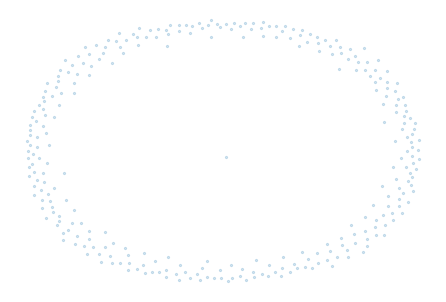

In [219]:
pos = nx.spring_layout(G)
nx.draw(G, pos=pos,node_size=5,alpha=0.2)

### Communities

#### What is the number of communities in nets[1]?

In [220]:
#find the community structure of nets[1] and print the number of communities in nets[1]
ung = nets[1].to_undirected()
cc = list(label_propagation_communities(ung))
len(cc)

1

#### How could you know it without running community detection?

#### What is the number of communities in the meta-network G?

In [221]:
#find the community structure of nets[1] and print the number of communities in nets[1]
ung = G.to_undirected()
cc = list(label_propagation_communities(ung))
len(cc)

300

#### Explain why is there this number of communities in G? 

Type Markdown and LaTeX:  𝛼2